In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [153]:
df=pd.read_csv('drive/MyDrive/lab4/BIDV.csv')
df
df1=df.reset_index()['Close']

In [154]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,14675.630859,14675.630859,14252.294922,14252.294922,14252.294922,1444627
1,2016-01-05,14252.294922,14393.407227,14111.183594,14181.739258,14181.739258,1621805
2,2016-01-06,14111.183594,14322.851562,14111.183594,14252.294922,14252.294922,1436023
3,2016-01-07,14181.739258,14252.294922,13405.624023,13617.291992,13617.291992,3661422
4,2016-01-08,13617.291992,13617.291992,12911.732422,13264.512695,13264.512695,1725963
...,...,...,...,...,...,...,...
2044,2024-03-14,53500.000000,53500.000000,51400.000000,51700.000000,51700.000000,1482400
2045,2024-03-15,51600.000000,52800.000000,51000.000000,52200.000000,52200.000000,1433700
2046,2024-03-18,52000.000000,52800.000000,49900.000000,52000.000000,52000.000000,1481000
2047,2024-03-19,52100.000000,52100.000000,51000.000000,51600.000000,51600.000000,765300


In [155]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [156]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [157]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [158]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest= create_dataset(test_data, time_step)

In [159]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(ytest.shape)



(1538, 100)
(1538,)
(309, 100)
(309,)


In [160]:
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=X_train[0][0],
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.01)

In [161]:
kf = kf.em(X_train[0])

In [162]:
test_data.shape

(410, 1)

In [163]:
test_observed = test_data
test_predicted, _ = kf.filter(test_observed)


In [164]:
test_predicted.shape

(410, 1)

In [165]:
test_predicted=scaler.inverse_transform(test_predicted)
ytest=ytest.reshape(-1,1)
ytest=scaler.inverse_transform(test_data)

In [166]:
test_rmse = np.sqrt(np.mean((test_predicted - ytest)**2))
test_mae = mean_absolute_error(test_predicted, ytest)
test_mape = np.mean(np.abs(test_predicted - ytest)/np.abs(test_predicted))*100

In [167]:
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 675.1360055219818
Testing MAPE: 0.6454734439493497
Testing MAE: 216.04306835875394


In [168]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape[1]

350

In [169]:
test_data[60:].shape

(350, 1)

In [170]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
print(x_input.shape)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):

    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        #print(x_input)
        yhat, _ = kf.filter(x_input)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat[-1].tolist())
        i=i+1
    else:
        x_input = x_input.reshape(n_steps)
        yhat, _ = kf.filter(x_input)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat[-1].tolist())
        i=i+1

Streaming output truncated to the last 5000 lines.
 [0.64575953]
 [0.65541012]
 [0.65142398]
 [0.65872399]
 [0.66720426]
 [0.66751211]
 [0.673042  ]
 [0.68407714]
 [0.70769237]
 [0.70727196]
 [0.71490434]
 [0.71261962]
 [0.71190923]
 [0.71013573]
 [0.70182119]
 [0.70234119]
 [0.70405549]
 [0.71235162]
 [0.72502318]
 [0.74060781]
 [0.7423483 ]
 [0.74288947]
 [0.73839988]
 [0.74787227]
 [0.74460704]
 [0.75601275]
 [0.7572302 ]
 [0.77080602]
 [0.80452696]
 [0.80957765]
 [0.83210844]
 [0.82514036]
 [0.81521067]
 [0.82143895]
 [0.82803338]
 [0.82930747]
 [0.87628226]
 [0.89011183]
 [0.88820138]
 [0.87984426]
 [0.86948267]
 [0.87480036]
 [0.87257223]
 [0.86799789]
 [0.85493093]
 [0.84388122]
 [0.83501136]
 [0.85942432]
 [0.86934398]
 [0.87475723]
 [0.87644038]
 [0.87075324]
 [0.88062959]
 [0.88525307]
 [0.89212482]
 [0.89426146]
 [0.92985977]
 [0.96577031]
 [0.96762026]
 [0.98216905]
 [0.97271912]
 [0.97754396]
 [0.97904415]
 [0.99348419]
 [0.99797404]
 [0.98229124]
 [0.94325731]
 [0.9218047

In [171]:
# Chuyển danh sách thành mảng numpy
values_array = np.array(lst_output)

# Nếu bạn thực sự cần reshape (ví dụ: thành mảng 2D 1 hàng)
values_reshaped = values_array.reshape(-1, 1)

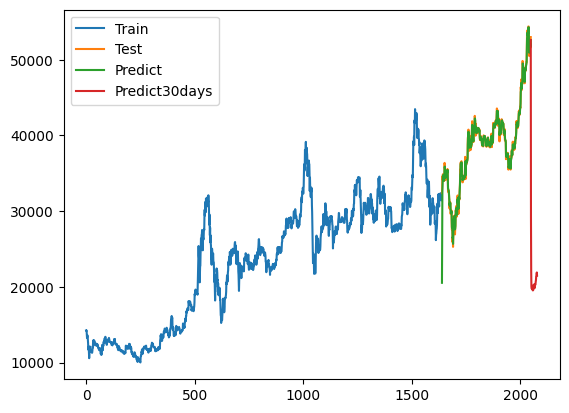

In [172]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,test_predicted)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(values_reshaped))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

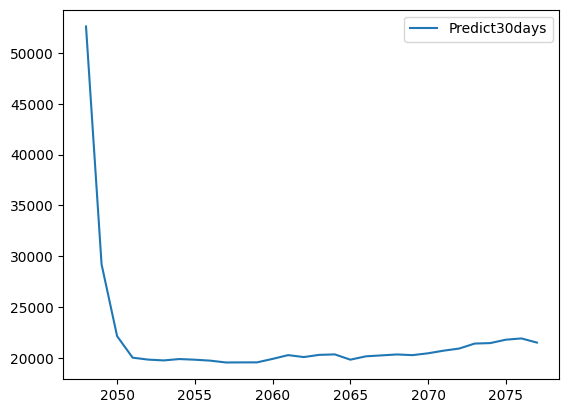

In [173]:
# 14.Vẽ hình
# Dự đoán 30 ngày tiếp theo
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(values_reshaped))
plt.legend(['Predict30days'])
plt.show()